# Gemstones - Predicting Price

![Gemstone](gemstone.png)

# Table of Contents

* [1. Introduction](#introduction)
* [2. Loading the Data](#loading-data)
* [3. Exploratory Data Analysis (EDA)](#eda)
* [4. Feature Engineering & Data Wrangling](#fe-dw)
* [5. Model Training](#model-training)
* [6. Submission](#submission)
* [ Result](#result)

#  1. Introduction <a class="anchor" id="introduction"></a>
Gemstones have captivated humanity for centuries with their exquisite beauty, rarity, and enduring allure. From the brilliant sparkle of diamonds to the mesmerizing hues of sapphires and emeralds, these precious stones hold a special place in our hearts and culture. However, determining the true value of a gemstone has always been a complex and intricate task, relying on a myriad of factors such as cut, clarity, carat weight, and color. To tackle this challenge and unlock new insights into pricing, the world of gemology has turned to the cutting-edge field of machine learning.

In this exploration of predicting gemstone prices using machine learning, we delve into the fascinating world of gemology, where the artistry of nature converges with the analytical power of technology. We will uncover the key factors that influence gemstone value, including the famous four Cs—cut, clarity, carat weight, and color—and examine how machine learning algorithms can learn from these factors to develop robust pricing models.

Join us on this captivating journey as we combine the timeless beauty of gemstones with the cutting-edge power of machine learning. Together, we will unravel the mysteries of gemstone valuation, unlocking new horizons in the fascinating world of precious gemstones.

`Note`: Remember that we are working with `cubic zirconia`. We are provided with the dataset containing the prices and other attributes of almost 193,600 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. We have to help the company in predicting the price for the stone on the basis of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have a better profit share `jewels`

# 2. Loading the Data <a class="anchor" id="loading-data"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv', index_col = 'id')

In [3]:
train_df

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036


## Feature Classification: Categorical and Numerical

### Categorical
- `nominal`, `ordinal`, `ratio`, `interval`

### Numerical
- `discrete`, `continuous`, `timeseries`

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 16.2+ MB


- Categorical: `cut`, `color` (Label), `clarity`
- Numerical: `depth`, `table`, `x`, `y`, `z`, `carat` (Continuous), `Price` 
- Mix types of data: `clarity`
- Contain Error/Typo: None
- Null values: None
- Various Data Types: String, Int, Float

In [5]:
train_df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [7]:
train_df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [4]:
train_df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [5]:
train_df.duplicated().sum()

0

No duplicated values 

## Attribute comprehension
- Carat: It is the weight of the cubic zirconia.
- Cut: It describes the cut quality of the cubic zirconia. Quality is in increasing order Fair, Good, Very Good, Premium, Ideal.(Ordinal data)
- Color: It is the colour of the cubic zirconia. D being the best and J the worst.
- Clarity: It refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
- Depth: It describes the height of the cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
- Table: It describes the width of the cubic zirconia’s Table expressed as a Percentage of its Average Diameter.
- Price: It describes the Price of the cubic zirconia.
- X: It describes the length of the cubic zirconia in mm.
- Y: It describes the width of the cubic zirconia in mm.
- Z: It describes the height of the cubic zirconia in mm.

In [6]:
train_df.describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


Some 0 values in x, y, z is quite an error that need to eliminate later

In [3]:
cat_features = ['cut', 'color', 'clarity']
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')
convert_cat(train_df, cat_features)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   carat    193573 non-null  float64 
 1   cut      193573 non-null  category
 2   color    193573 non-null  category
 3   clarity  193573 non-null  category
 4   depth    193573 non-null  float64 
 5   table    193573 non-null  float64 
 6   x        193573 non-null  float64 
 7   y        193573 non-null  float64 
 8   z        193573 non-null  float64 
 9   price    193573 non-null  int64   
dtypes: category(3), float64(6), int64(1)
memory usage: 12.4 MB


In [12]:
train_df.describe(include = ['category'])

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


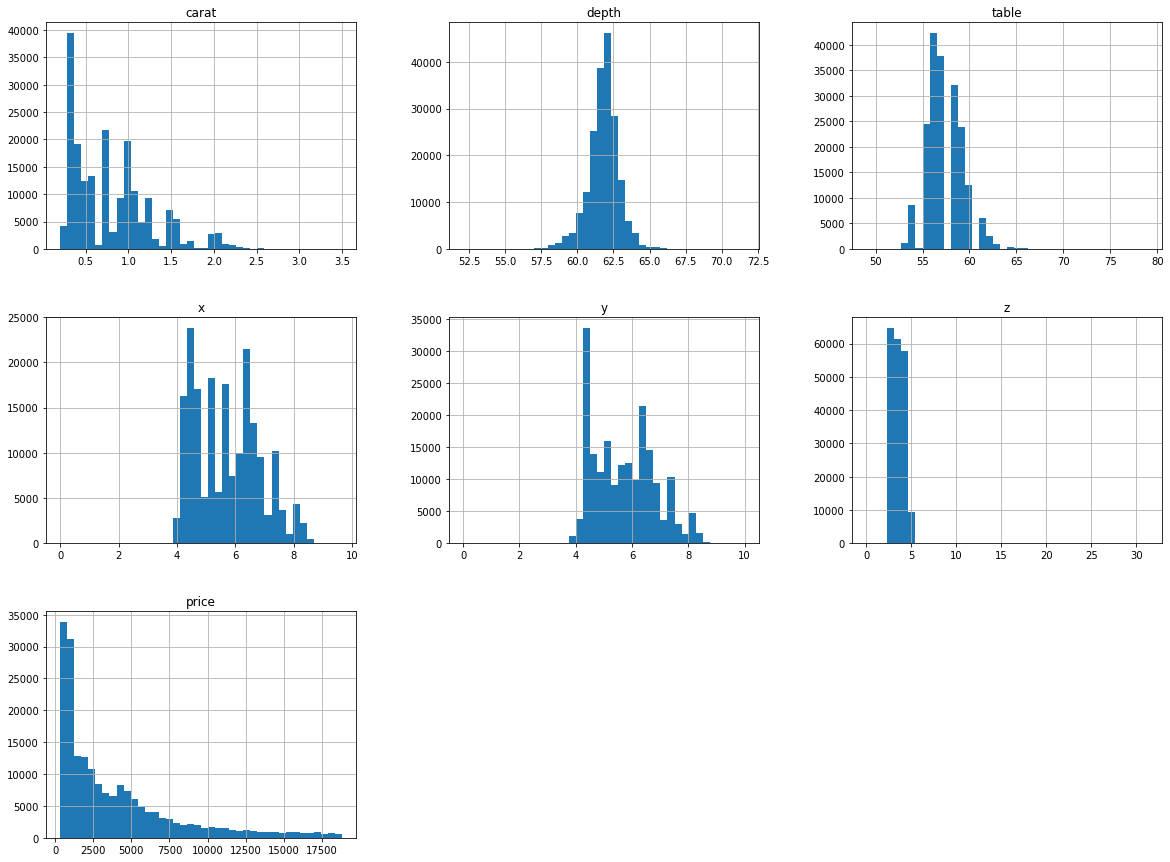

In [8]:
train_df.hist(bins=40, figsize=(20,15));

As we can see here from the plot, the skewness of `price` and `carat` has been fallen to the left that might impact badly to

our model prediction. We will calculate .skew below for more detail after we wrang data

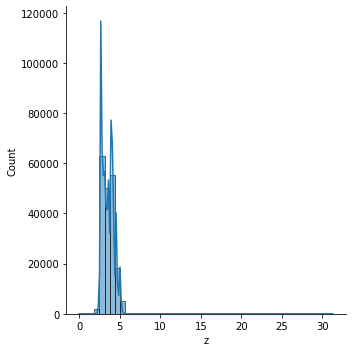

In [7]:
#plt.figure(figsize=(60,5))
sns.displot(data=train_df, x='z', kde=True, bins=50);

In [11]:
train_df[train_df['z']>6]

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
17041,2.01,Premium,I,VS1,59.1,60.0,8.28,8.21,8.18,17640
94237,2.10,Premium,H,I1,61.1,57.0,8.42,8.28,8.35,12512
127668,2.22,Ideal,G,VS2,61.8,57.0,8.36,8.32,8.40,18736
140193,3.50,Very Good,H,SI2,62.8,57.0,9.65,9.59,6.03,18507
167044,0.51,Premium,G,VS2,61.8,58.0,5.20,5.13,31.30,1447


In [12]:
train_df[train_df['z'] <= 2]

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
8750,1.02,Premium,H,SI2,59.4,61.0,6.57,6.53,0.00,4144
39413,2.18,Premium,H,SI2,59.4,60.0,8.46,8.41,0.00,15842
83284,1.07,Ideal,H,SI1,61.3,57.0,6.57,6.62,1.05,5125
92703,0.71,Good,F,SI1,64.1,60.0,0.00,0.00,0.00,2130
98719,2.17,Premium,H,SI2,60.3,57.0,8.42,8.36,0.00,15923
99624,2.20,Premium,I,SI2,60.1,60.0,8.45,8.41,0.00,11221
117161,2.20,Premium,F,SI2,60.3,58.0,8.49,8.45,0.00,15188
151690,2.18,Premium,I,VS2,61.2,62.0,8.45,8.37,0.00,15701
159429,2.18,Premium,H,SI2,60.8,59.0,8.42,8.38,0.00,13938


In [13]:
train_df[train_df['z']>5].shape[0]

5100

Notice a few things here:

1. First, `depth`, `table`, `x`, `y`, `z` have inequaly distribution, lots of data in 1 place and others outlier take further away from main data

2. To comprehend the outliers to represent something or just error. We may discuss more deeper in our data and about how good is our data

3. These attributes have little different scales. We will discuss this later in this chapter when we explore feature scaling.

4. Finally, many histograms are tail heavy: they extend much farther to the left of the median than to the right. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

### Understand more about our data
- 1 carat = 0.2 gram
- Depth and Table have unit of %
![Gemstone](DiamondDetail.png)
- Formula:

Average girdle diameter = (minimum diameter + maximum diameter) ÷ 2

                    = (x + y) ÷ 2

`Depth` = (depth ÷ average girdle diameter) x 100

      = (z ÷ average girdle diameter) x 100

`Table` = (average table size ÷ average girdle diameter) x 100

From the knowlegde above
As we can seen from our data, the `Depth` can be calculated by x,y and z so we can check the validation of outliers and some others to decide whether or not it can be an error to replace 

In [55]:
train_df['cut'].value_counts()

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

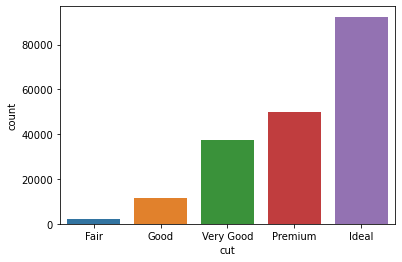

In [18]:
sns.countplot(x=train_df['cut'], order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']);

In [19]:
train_df['color'].value_counts()

G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64

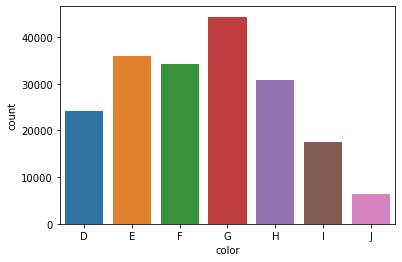

In [21]:
sns.countplot(x=train_df['color'], order=['D', 'E', 'F', 'G', 'H', 'I', 'J']);

In [22]:
train_df['clarity'].value_counts()

SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64

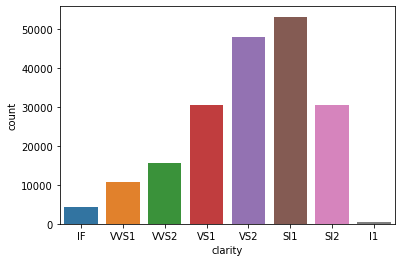

In [23]:
sns.countplot(x=train_df['clarity'], order=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']);

In [12]:
train_df[(train_df['carat'] == 0.3) & (train_df['color'] == 'E')
         & (train_df['clarity'] == 'SI1') & (train_df['cut'] == 'Ideal')
        & (train_df['price'] == 499)]

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
8280,0.3,Ideal,E,SI1,62.3,54.0,4.29,4.32,2.68,499
15084,0.3,Ideal,E,SI1,62.5,58.0,4.28,4.29,2.68,499
23542,0.3,Ideal,E,SI1,61.3,55.0,4.34,4.38,2.67,499
26223,0.3,Ideal,E,SI1,61.1,58.0,4.29,4.32,2.63,499
27774,0.3,Ideal,E,SI1,62.0,54.2,4.32,4.33,2.68,499
28797,0.3,Ideal,E,SI1,61.6,56.0,4.31,4.33,2.67,499
39518,0.3,Ideal,E,SI1,61.7,55.0,4.31,4.36,2.67,499
48425,0.3,Ideal,E,SI1,60.6,56.0,4.39,4.41,2.67,499
49414,0.3,Ideal,E,SI1,61.7,57.0,4.32,4.34,2.67,499


Some datas really have the same with each other make our dataset plentiful but not so diversity

This might cause our model to run slow but not efficiency, we will think about stratified for tuning and testing model

# 3. Exploratory Data Analysis (EDA)<a class="anchor" id="eda"></a>

### 3.1 Continuous feature distribution

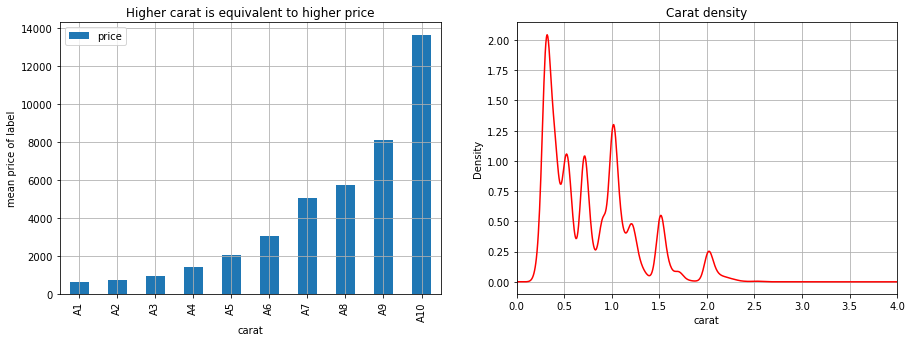

In [139]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(15,5))
train_df.groupby(by=pd.qcut(train_df.carat,10, labels=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10'])).agg({'price':'mean'}).plot(kind='bar',grid=True, ax=ax[0], title='Higher carat is equivalent to higher price')
train_df.carat.plot(kind='kde',grid=True, ax=ax[1], title='Carat density', color='red', xlim=(0,4));
ax[1].set_xlabel('carat')
ax[0].set_ylabel('mean price of label');

notice here `carat` is important feature that we might think about stratified it later to make our data smaller for validation process

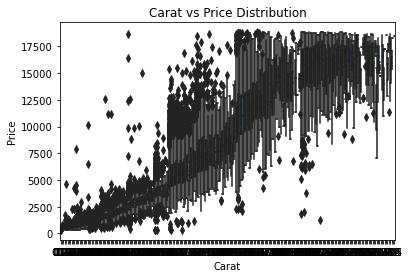

In [32]:
sns.boxplot(data=train_df, x='carat', y='price', palette='Blues')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Carat vs Price Distribution')
plt.show()

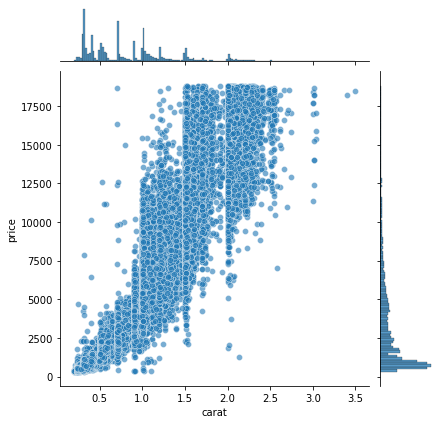

In [4]:
sns.jointplot(data=train_df, x='carat', y='price', alpha=0.6);

We can see from here pretty sure that `carat` show a strong correlation with our target value `price`

We will go in detail below when calculate .corr()

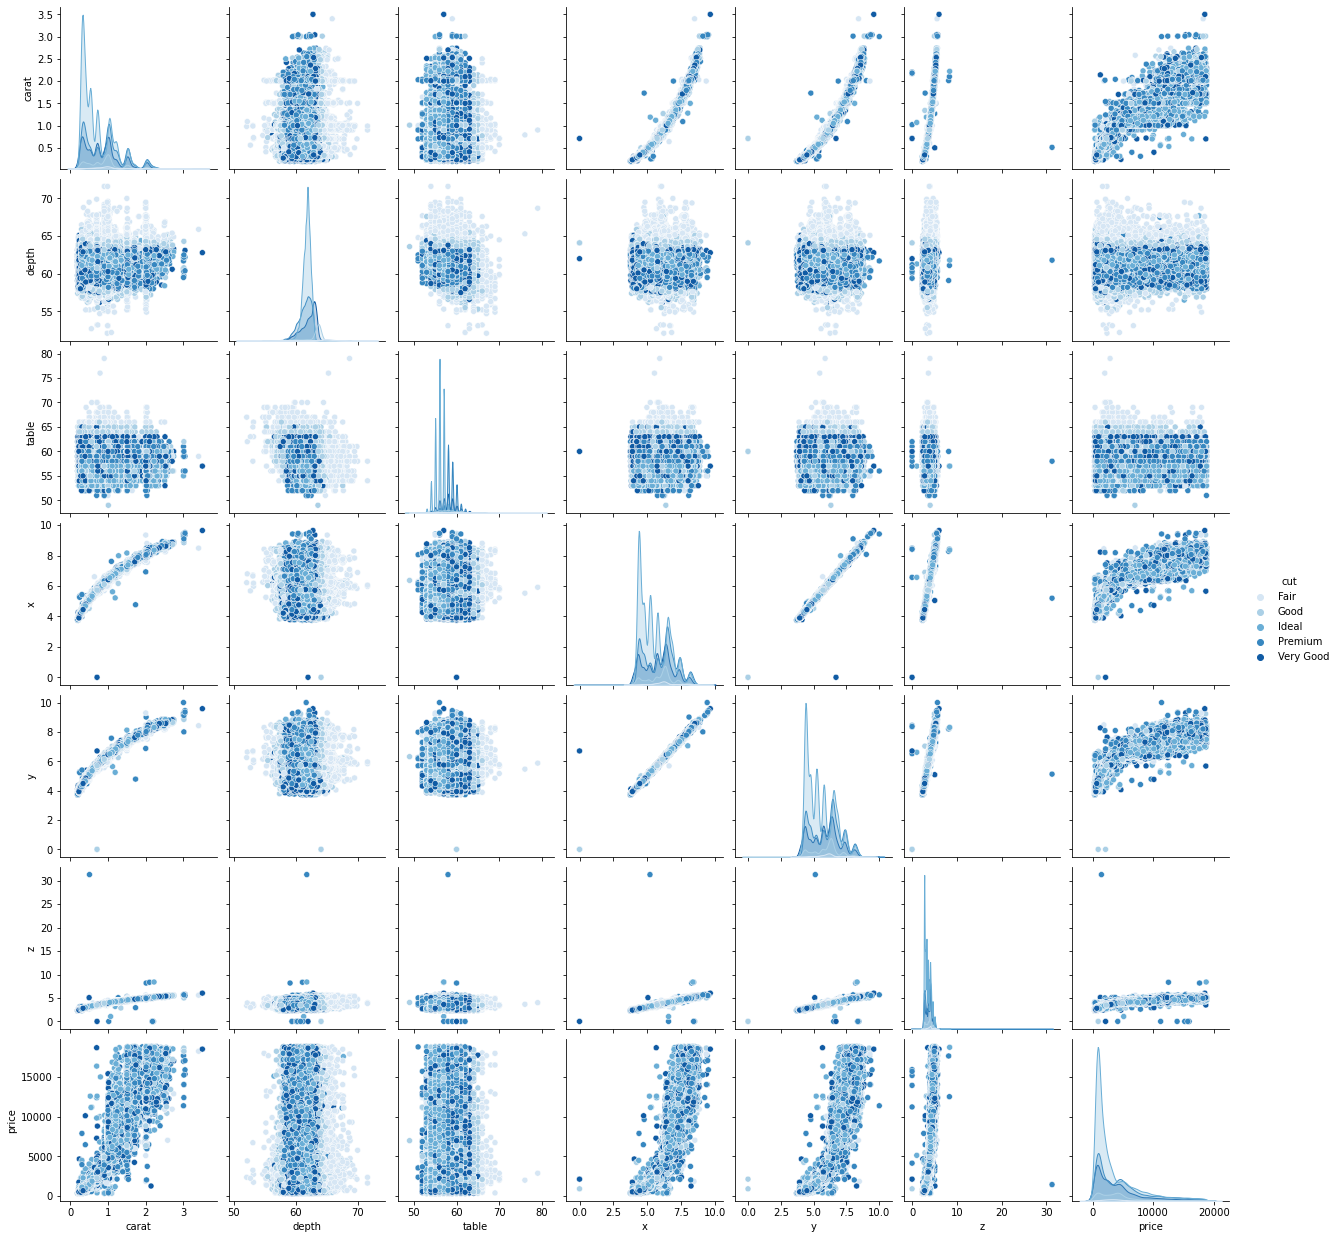

In [39]:
sns.pairplot(data=train_df, hue='cut', palette="Blues");

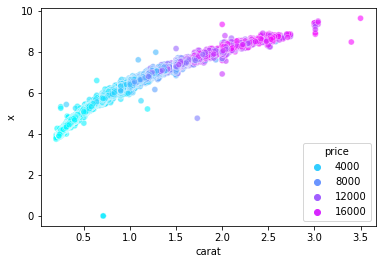

In [6]:
sns.scatterplot(data=train_df, x="carat", y="x", hue="price", palette='cool', alpha=0.6);

#### A few points to notice:

There are some features with datapoint that are far from the rest of the dataset which will affect the outcome of our regression model.

- "y" and "z" have some dimensional outlies in our dataset that might needs to be eliminated
- The "depth" should be capped but we must examine the regression line to be sure
- The "table" featured should be capped too
- Let's have a look at regression plots to get a close look at the outliers

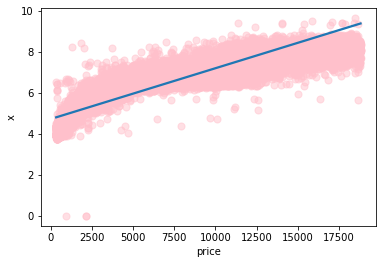

In [13]:
sns.regplot(data=train_df, x='price', y='x', scatter_kws={'alpha': 0.5, 's': 50, 'color': 'pink'});

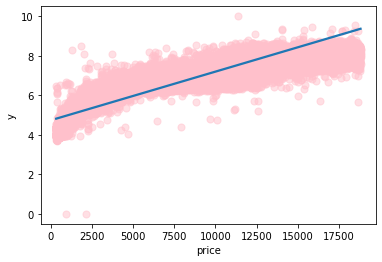

In [22]:
sns.regplot(data=train_df, x='price', y='y', scatter_kws={'alpha': 0.5, 's': 50, 'color': 'pink'});

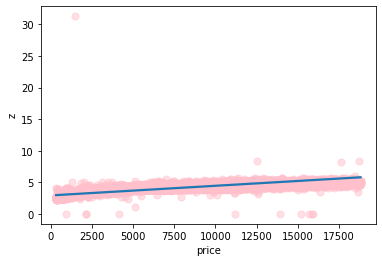

In [23]:
sns.regplot(data=train_df, x='price', y='z', scatter_kws={'alpha': 0.5, 's': 50, 'color': 'pink'});

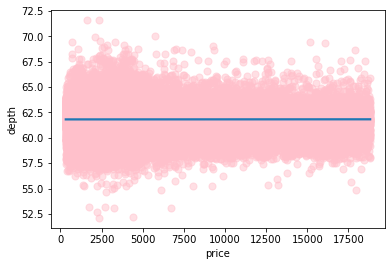

In [24]:
sns.regplot(data=train_df, x='price', y='depth', scatter_kws={'alpha': 0.5, 's': 50, 'color': 'pink'});

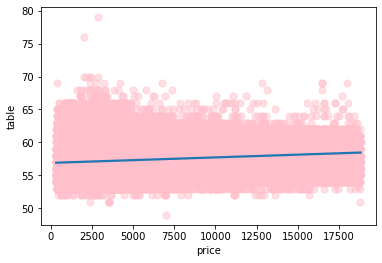

In [25]:
sns.regplot(data=train_df, x='price', y='table', scatter_kws={'alpha': 0.5, 's': 50, 'color': 'pink'});

We can clearly spot outliers in these attributes. We will remove these data points in part 4

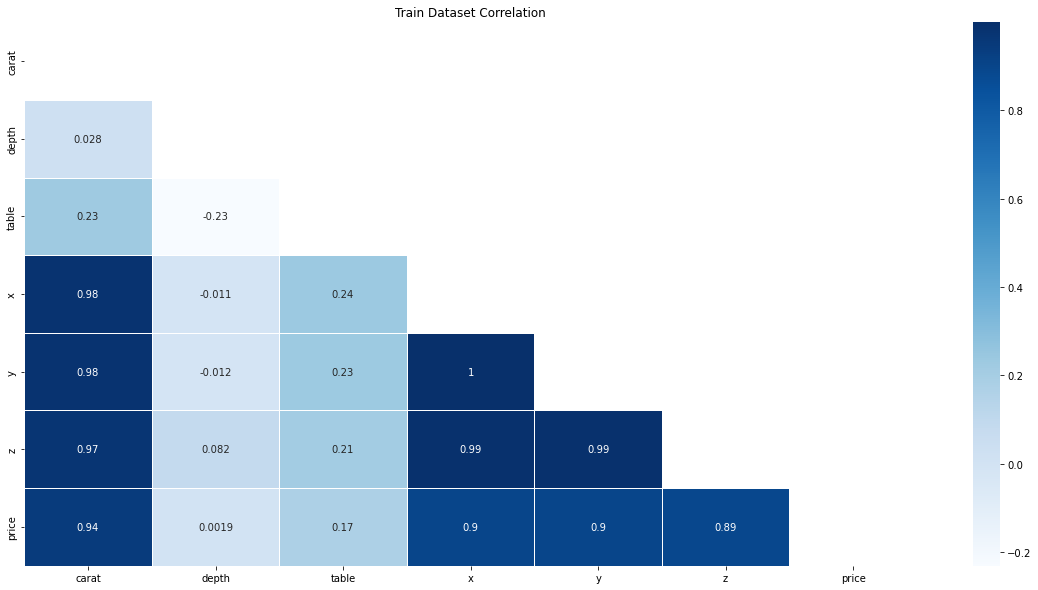

In [4]:
def plot_correlation_heatmap(df, title_name: str='Train correlation'):
    """Draws the correlation heatmap plot.
    
    Args:
        df: train or test dataframes
        title_name: 'Train' or 'Test' (default 'Train correlation')
        
    Returns:
        subplots of size (len(col_list), 2)
    """

    corr = df.corr()
    fig, axes = plt.subplots(figsize=(20, 10))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, linewidths=.5, cmap='Blues', annot=True)
    plt.title(title_name)
    plt.show()

#plot_correlation_heatmap(origin, 'Original Dataset Correlation')
plot_correlation_heatmap(train_df, 'Train Dataset Correlation')
#plot_correlation_heatmap(train, 'Test Dataset Correlation')

All the above plots indicate some understandable findings: 

The dimensions of a diamond (i.e., x, y, and z) show a strong correlation with its `price` and `carat` weight. As the dimensions of a diamond increase, so does its volume, which in turn affects its mass, as mass is equal to volume multiplied by density. We also think about make feature named volume but don't have enough attributes so ignore it.

And beacause our data quite big so we will split stratifed based on `carat` in order to learning faster with cv and also make our data more equaly.

`x` and `y` is highest correlation, which we can think about fusion it into average girdle diameter in the future, also is `z` but still have some outliers in `z` which we might have to take care of it.

`depth`, `cut` and `table` show low correlation. We could consider dropping but let's keep it.

### 3.2 Categorical feature distribution

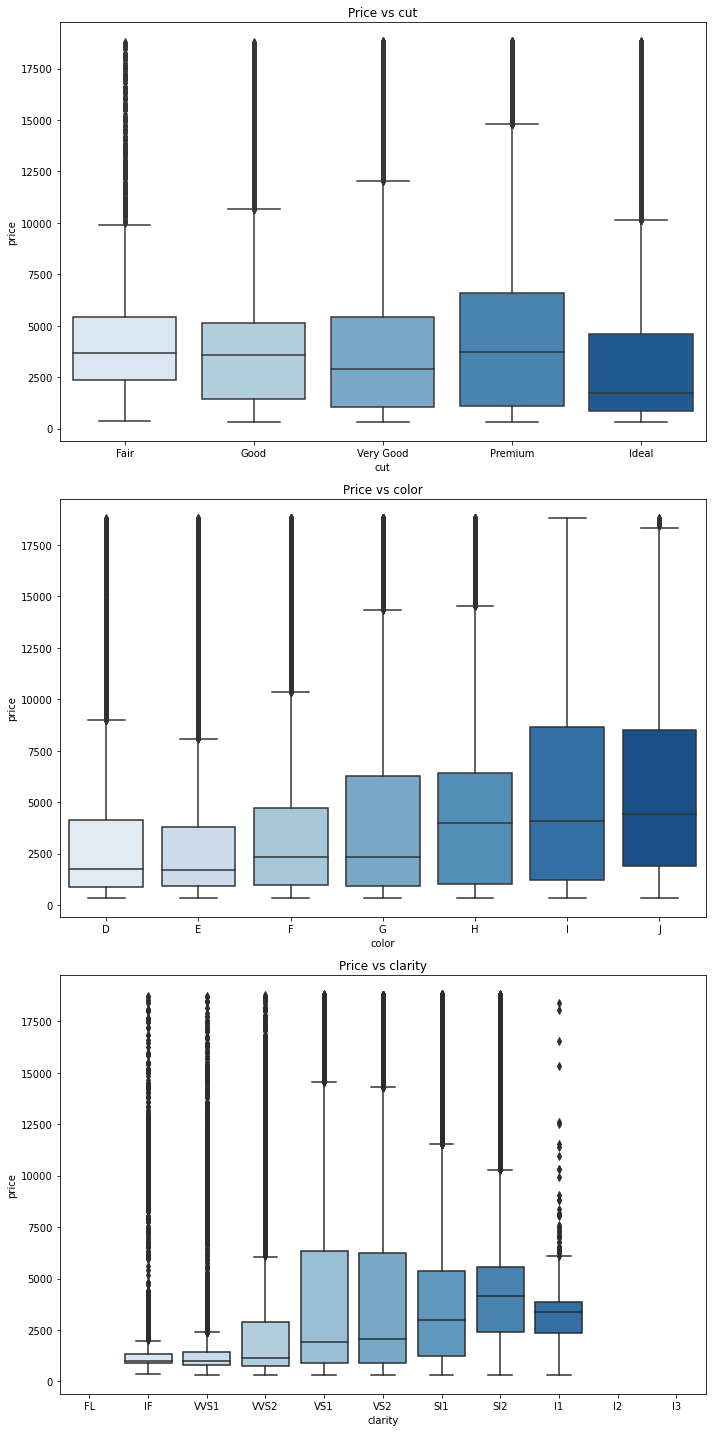

In [49]:
category_orders={'cut': ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
                 'color': ['D', 'E', 'F', 'G', 'H', 'I', 'J'],
                 'clarity': ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3']}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

for i, c in enumerate(cat_features):
    ax = axes[i]
    
    sns.boxplot(data=train_df, x=c, y='price', order=category_orders[c], palette='Blues', ax=ax);
    
    ax.set_title(f'Price vs {c}')
#     ax.set_xlabel('X Variable')
#     ax.set_ylabel('Y Variable')

plt.tight_layout()

# Show the figure
plt.show()

Nothing Noticeable here but we can assume that `price` don't depend much on categorical features 

# 4.  Feature Engineering & Data Wrangling <a class="anchor" id="fe-dw"></a>

x, y, z can not be 0 (Data error maybe, we will discard it)

Diamonds can not be 2 dimensional or 1 dimensional

In [12]:
train_df[train_df['x'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
92703,0.71,Good,F,SI1,64.1,60.0,0.0,0.00,0.0,2130
170318,0.71,Good,D,VS2,64.1,60.0,0.0,0.00,0.0,910
178000,0.71,Very Good,F,SI2,62.0,60.0,0.0,6.71,0.0,2130


In [13]:
train_df[train_df['y'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
92703,0.71,Good,F,SI1,64.1,60.0,0.0,0.0,0.0,2130
170318,0.71,Good,D,VS2,64.1,60.0,0.0,0.0,0.0,910


In [15]:
train_df[train_df['z'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
8750,1.02,Premium,H,SI2,59.4,61.0,6.57,6.53,0.0,4144
39413,2.18,Premium,H,SI2,59.4,60.0,8.46,8.41,0.0,15842
92703,0.71,Good,F,SI1,64.1,60.0,0.00,0.00,0.0,2130
98719,2.17,Premium,H,SI2,60.3,57.0,8.42,8.36,0.0,15923
99624,2.20,Premium,I,SI2,60.1,60.0,8.45,8.41,0.0,11221
117161,2.20,Premium,F,SI2,60.3,58.0,8.49,8.45,0.0,15188
151690,2.18,Premium,I,VS2,61.2,62.0,8.45,8.37,0.0,15701
159429,2.18,Premium,H,SI2,60.8,59.0,8.42,8.38,0.0,13938
170318,0.71,Good,D,VS2,64.1,60.0,0.00,0.00,0.0,910


In [16]:
train_df[train_df['y'] >= 10]

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
47783,3.0,Premium,I,I1,61.7,56.0,9.42,10.01,5.67,11370


In [4]:
# since there is no row where x = 0 or y = 0 and z is non-zero, so we just need to drop the rows which z = 0
print(train_df[train_df['z'] == 0].shape[0])
train_df = train_df.drop(train_df[(train_df['z'] == 0) | (train_df['z'] > 30)].index)
train_df = train_df.drop(train_df[(train_df['z'] <= 2) | (train_df['z'] >= 6) | (train_df['y'] >= 10)].index)
print(train_df.shape)

10
(193556, 10)


We can calculate the `depth` again to correct it if necessary

But before that we also need to calculate and add Average girdle diameter, write shorten form `diameter` round up it to 2 digits

### NOTE: depth make by divided by diameter so it can not be 0, so we move this part after we eliminate 0 value

After that we calculate the average of depth error

In [5]:
train_df['diameter'] = round((train_df.x + train_df.y)/2, 2)
train_df['depth_adj'] = round((train_df.z/train_df.diameter)*100, 1)

# train_df['esti_volume'] = round(train_df.z*train_df.y*train_df.x, 2)

# sns.regplot(data=train_df, x='price', y='esti_volume', scatter_kws={'alpha': 0.5, 's': 50, 'color': 'pink'});

In [19]:
abs(train_df['depth_adj'] - train_df['depth']).mean()

0.10215028208892728

Not so much error to affect our bad to our prediction but we still get eliminate of `depth`

also `esti_volume` look good correlation with the prediction, we will test real number below

In [6]:
train_df.drop('depth', axis = 1, inplace = True)
train_df

,carat,cut,color,clarity,table,x,y,z,price,diameter,depth_adj
id,,,,,,,,,,,
0,1.52,Premium,F,VS2,58.0,7.27,7.33,4.55,13619,7.30,62.3
1,2.03,Very Good,J,SI2,58.0,8.06,8.12,5.05,13387,8.09,62.4
2,0.70,Ideal,G,VS1,57.0,5.69,5.73,3.50,2772,5.71,61.3
3,0.32,Ideal,G,VS1,56.0,4.38,4.41,2.71,666,4.39,61.7
4,1.70,Premium,G,VS2,59.0,7.65,7.61,4.77,14453,7.63,62.5
...,...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,56.0,4.35,4.39,2.67,1130,4.37,61.1
193569,0.70,Premium,G,VVS2,58.0,5.75,5.77,3.47,2874,5.76,60.2
193570,0.73,Very Good,F,SI1,57.0,5.72,5.75,3.62,3036,5.74,63.1


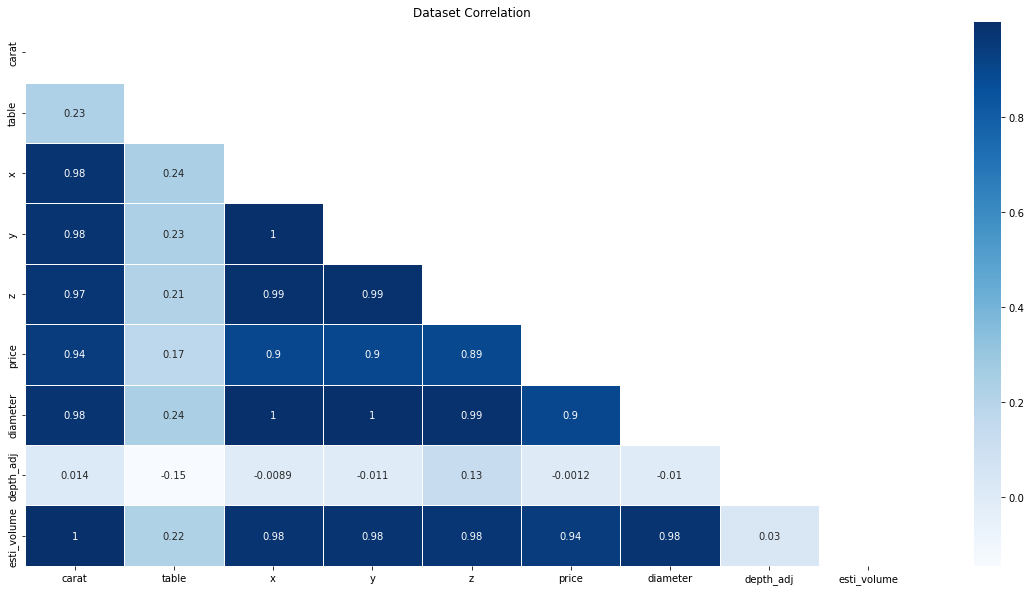

In [7]:
plot_correlation_heatmap(train_df, 'Dataset Correlation')
# X = train_df.drop(['price'], axis=1)
# y = train_df['price']

the `depth_adj` quite the same correlation with the first `depth` and `diameter` show good correlation as we expected

### split the data stratified based on carat 

We want to ensure that the test set is representative of the various categories of incomes in the whole dataset

So `carat` will be divined into 0-0.5-1.5-inf

Also we want to minimize our datasets by taking only 50% for validation model

In [8]:
train_df['weight_cat'] = pd.cut(train_df['carat'],
                               bins=[0., 0.5, 1.5, np.inf],
                               labels=[1, 2, 3])

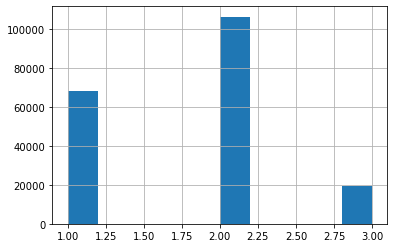

In [9]:
train_df['weight_cat'].hist();

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

spliting = StratifiedShuffleSplit(n_splits=1, test_size=0.6, random_state=21)
for use_index, leave_index in spliting.split(train_df, train_df['weight_cat']):
    stra_use_set = train_df.iloc[use_index]
    stra_leave_set = train_df.iloc[leave_index]

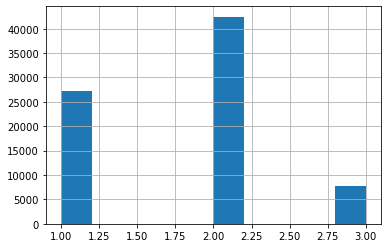

In [11]:
stra_use_set['weight_cat'].hist();

In [29]:
stra_use_set.iloc[:, 11]

id
87731     2
95252     1
58309     2
101921    1
53926     2
         ..
97106     2
155163    2
135009    3
127912    2
86808     1
Name: weight_cat, Length: 77422, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [12]:
y = stra_use_set['price']
X = stra_use_set.drop('price', axis=1)

We will only use 40% of data for applying to the model because our data quite big, reduce time consuming

In [34]:
stra_use_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77422 entries, 87731 to 86808
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   carat       77422 non-null  float64 
 1   cut         77422 non-null  category
 2   color       77422 non-null  category
 3   clarity     77422 non-null  category
 4   table       77422 non-null  float64 
 5   x           77422 non-null  float64 
 6   y           77422 non-null  float64 
 7   z           77422 non-null  float64 
 8   price       77422 non-null  int64   
 9   diameter    77422 non-null  float64 
 10  depth_adj   77422 non-null  float64 
 11  weight_cat  77422 non-null  category
dtypes: category(4), float64(7), int64(1)
memory usage: 5.6 MB


In [13]:
num_features = ['carat', 'depth_adj', 'table', 'x', 'y', 'z', 'diameter']

In [37]:
train_df[num_features].skew().sort_values

<bound method Series.sort_values of carat        0.993911
depth_adj   -0.046152
table        0.619147
x            0.362721
y            0.357705
z            0.354970
diameter     0.359856
dtype: float64>

`carat` is the vital value, it show a pretty high skewness, so we think about transform it to nearly normal distribution by

taking square root (cause our `carat` data is fall to the left)

In [14]:
train_df['carat'] = np.sqrt(train_df['carat'])

In [45]:
train_df[num_features].skew().sort_values

<bound method Series.sort_values of carat        0.497810
depth_adj   -0.046152
table        0.619147
x            0.362721
y            0.357705
z            0.354970
diameter     0.359856
dtype: float64>

we will add `weight_cat` as a new attribute

In [15]:
cat_features.append('weight_cat')
cat_features

['cut', 'color', 'clarity', 'weight_cat']

In [16]:
category_order = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
                  ['D', 'E', 'F', 'G', 'H', 'I', 'J'],
                  ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'],
                  ['1', '2', '3']]

In [17]:
# preprocess pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
#from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


num_transformer = Pipeline(steps =[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder(categories = category_order))
])

In [18]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [38]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['carat', 'depth_adj', 'table', 'x', 'y', 'z',
                                  'diameter']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['D',
                                                                              'E',
                                                                              'F',
                                                                              'G',
                                                                              'H',
                                                                              'I',
                                                                              'J'],
                                                                             ['IF',
                                                                              'VVS1',
                                                                              'VVS2',
                                                                              'VS1',
                                                                              'VS2',
                                                                              'SI1',
                                                                              'SI2',
                                                                              'I1'],
                                                                             ['1',
                                                                              '2',
                                                                              '3']]))]),
                                 ['cut', 'color', 'clarity', 'weight_cat'])])

In [39]:
X = preprocessor.transform(X)
X.shape

(77422, 11)

# 5. Model Training <a class="anchor" id="model-training"></a>

## 5.1 Training and Evaluating on the Training Set

As you can see, the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset

## Linear, Ridge, Lasso, Elastic Net Regression

In [19]:
import sklearn
from sklearn.linear_model import LinearRegression, Ridge,Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [20]:
def gen_linear_model(model, X_train, y_train, X_val, y_val):
    model_name = model.__class__.__name__
    model_reg = model
    model_reg.fit(X_train, y_train)
    y_pred = model_reg.predict(X_val)
    model_mse = mean_squared_error(y_pred, y_val)
    model_rmse = np.sqrt(model_mse)
    model_r2_score = r2_score(y_pred, y_val)
    print(model_name)
    print('RMSE: ', model_rmse)
    print('R2 Score: ', model_r2_score)

In [21]:
y_train = stra_use_set['price']
X_train = stra_use_set.drop(['price'], axis=1)
y_val = stra_leave_set['price']
X_val = stra_leave_set.drop(['price'], axis=1)

In [22]:
preprocessor.fit(X_train)
preprocessor.fit(X_val)
X_train = preprocessor.transform(X_train)
X_val = preprocessor.transform(X_val)

In [54]:
gen_linear_model(LinearRegression(), X_train, y_train, X_val, y_val)

LinearRegression
RMSE:  1010.6101376835952
R2 Score:  0.9331235065116853


In [57]:
param_grid = {'alpha': [0, 0.05, 0.1, 0.2, 0.5, 1, 1.5, 2]}
grid_search = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
# print(grid_search.cv_results_)
predictions = grid_search.predict(X_val)
print('RMSE:', np.sqrt(np.mean((predictions - y_val)**2)))

{'alpha': 0.05}
RMSE: 1010.6093396994696


[1010.6101376834993, 1010.6093396994795, 1010.6095613216879, 1010.6113847977296, 1010.6179433165662, 1010.6236982908531, 1010.6270027053685, 1010.6476167194505, 1010.7106060845398, 1010.9667783925067]


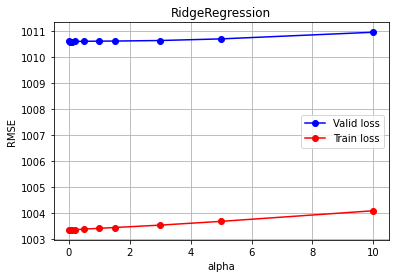

In [68]:
train_rmse = []
rmse = []
parameter =  [0, 0.05, 0.1, 0.2, 0.5, 1, 1.5, 3, 5 ,10]
for p in parameter:
    model = Ridge(alpha = p)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_train_pred = model.predict(X_train)
    model_rmse = np.sqrt(mean_squared_error(y_pred, y_val))
    model_rmse_train = np.sqrt(mean_squared_error(y_train_pred, y_train))
    rmse.append(model_rmse)
    train_rmse.append(model_rmse_train)
print(rmse)
plt.plot(parameter, rmse, 'bo-', label = 'Valid loss')
plt.plot(parameter, train_rmse, 'ro-', label = 'Train loss')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.grid(True)
plt.title('RidgeRegression')
plt.show()

In [69]:
param_grid = {'alpha': [0.05, 0.1, 0.2, 0.5, 1, 1.5, 2]}
grid_search = GridSearchCV(Lasso(max_iter = 10000, tol =0.01), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
predictions = grid_search.predict(X_val)
print('RMSE:', np.sqrt(np.mean((predictions - y_val)**2)))

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.110e+10, tolerance: 1.002e+10
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.016e+10, tolerance: 1.002e+10
  model = cd_fast.enet_coordinate_descent(


{'alpha': 0.05}
RMSE: 1010.5515402805578


[1010.5515402805573, 1010.6060164658456, 1011.0383163885632, 1014.023926822281, 1014.7718069714878, 1014.912566649249, 1015.1147638332434]


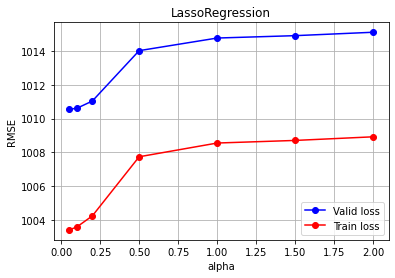

In [70]:
train_rmse = []
rmse = []
parameter = [0.05, 0.1, 0.2, 0.5, 1, 1.5, 2]
for p in parameter:
    model = Lasso(alpha = p, max_iter = 10000, tol=0.01)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_train_pred = model.predict(X_train)
    model_rmse = np.sqrt(mean_squared_error(y_pred, y_val))
    model_rmse_train = np.sqrt(mean_squared_error(y_train_pred, y_train))
    rmse.append(model_rmse)
    train_rmse.append(model_rmse_train)
print(rmse)
plt.plot(parameter, rmse, 'bo-', label = 'Valid loss')
plt.plot(parameter, train_rmse, 'ro-', label = 'Train loss')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.grid(True)
plt.title('LassoRegression')
plt.legend()
plt.show()

In [71]:
param_grid = {'alpha': [0.05, 0.1, 0.2, 0.5, 1, 1.5, 2]}
grid_search = GridSearchCV(ElasticNet(max_iter = 10000), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
predictions = grid_search.predict(X_val)
print('RMSE:', np.sqrt(np.mean((predictions - y_val)**2)))

{'alpha': 0.05}
RMSE: 1132.1145570570548


[1017.6761359176156, 1132.1145570570525, 1224.1221558014292, 1319.4777039237733, 1428.8634488014359, 1519.7186286733468]


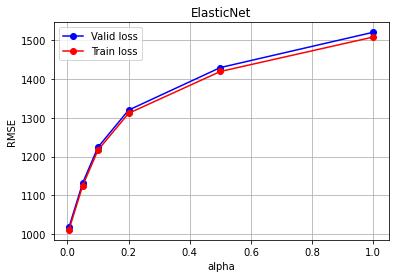

In [80]:
train_rmse = []
rmse = []
parameter = [0.005, 0.05, 0.1, 0.2, 0.5, 1]
for p in parameter:
    model = ElasticNet(alpha = p, max_iter = 10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_train_pred = model.predict(X_train)
    model_rmse = np.sqrt(mean_squared_error(y_pred, y_val))
    model_rmse_train = np.sqrt(mean_squared_error(y_train_pred, y_train))
    rmse.append(model_rmse)
    train_rmse.append(model_rmse_train)
print(rmse)
plt.plot(parameter, rmse, 'bo-', label = 'Valid loss')
plt.plot(parameter, train_rmse, 'ro-', label = 'Train loss')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.grid(True)
plt.title('ElasticNet')
plt.legend()
plt.show()

For our problem, the data is not like linear distribution, and the data is also dense, so the linear regressions only create a linear line to minimize the loss of all data points,  therefore no reliable as other regression algorithms

## KNeighbors Regression

In [74]:
from sklearn.neighbors import KNeighborsRegressor

In [75]:
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 7, 10, 15, 20, 50]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
predictions = grid_search.predict(X_val)
print('RMSE:', np.sqrt(np.mean((predictions - y_val)**2)))

{'n_neighbors': 10}
RMSE: 670.9380573217634


[869.1275856507775, 756.9856495208605, 687.7099145086614, 677.2048694459817, 670.9380573217659, 670.1612930157582, 670.9277166096056, 670.5145752677739, 673.4991942298786, 679.4562312589402]


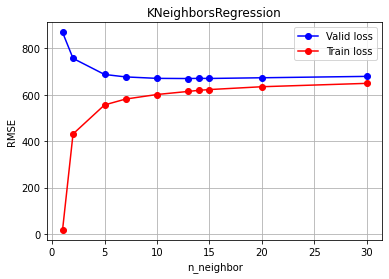

In [82]:
train_rmse = []
rmse = []
parameter = [1, 2, 5, 7, 10, 13, 14, 15, 20, 30]
for p in parameter:
    model = KNeighborsRegressor(n_neighbors = p)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_train_pred = model.predict(X_train)
    model_rmse = np.sqrt(mean_squared_error(y_pred, y_val))
    model_rmse_train = np.sqrt(mean_squared_error(y_train_pred, y_train))
    rmse.append(model_rmse)
    train_rmse.append(model_rmse_train)
print(rmse)
plt.plot(parameter, rmse, 'bo-', label = 'Valid loss')
plt.plot(parameter, train_rmse, 'ro-', label = 'Train loss')
plt.xlabel('n_neighbor')
plt.ylabel('RMSE')
plt.grid(True)
plt.title('KNeighborsRegression')
plt.legend()
plt.show()

## Decision Tree Regression

In [79]:
from sklearn.tree import DecisionTreeRegressor 

In [84]:
param_grid = {'max_depth': [1, 2, 5, 7, 8, 9, 10, 15, 20, 50]}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
predictions = grid_search.predict(X_val)
print('RMSE:', np.sqrt(np.mean((predictions - y_val)**2))) 

{'max_depth': 10}
RMSE: 645.242343959888


[2446.276564643987, 1518.2281209614218, 842.1792591515992, 696.2128231880909, 662.9007222970444, 644.4109046988966, 644.2590957655706, 682.4745478399576, 754.254363363169, 822.8048018745794, 842.3482258514777]


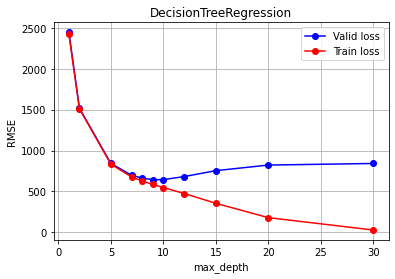

In [93]:
train_rmse = []
rmse = []
parameter = [1, 2, 5, 7, 8, 9, 10, 12, 15, 20, 30]
for p in parameter:
    model = DecisionTreeRegressor(max_depth = p)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_train_pred = model.predict(X_train)
    model_rmse = np.sqrt(mean_squared_error(y_pred, y_val))
    model_rmse_train = np.sqrt(mean_squared_error(y_train_pred, y_train))
    rmse.append(model_rmse)
    train_rmse.append(model_rmse_train)
print(rmse)
plt.plot(parameter, rmse, 'bo-', label = 'Valid loss')
plt.plot(parameter, train_rmse, 'ro-', label = 'Train loss')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.grid(True)
plt.title('DecisionTreeRegression')
plt.legend()
plt.show()

## 5.2 Cross-Validation

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X, y,
                         scoring="neg_root_mean_squared_error", cv=10)
tree_rmse_scores = -scores

In [158]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [44]:
display_scores(tree_rmse_scores)

Scores: [820.73793344 846.21302791 824.76538109 867.74386654 869.03797345
 816.07365831 811.36492856 803.94087051 843.53087502 802.86055933]
Mean: 830.6269074162321
Standard deviation: 23.367933194874848


In [45]:
lin_scores = cross_val_score(li_reg, X, y,                           
                             scoring="neg_root_mean_squared_error", cv=10)
lin_rmse_scores = -lin_scores
display_scores(lin_rmse_scores)

Scores: [ 998.93814381  984.50978396  990.9758408  1028.43627835  992.98373477
 1009.55322085  963.80609407  990.95700993  998.99525359  980.08544631]
Mean: 993.9240806451475
Standard deviation: 16.406794974458855


In [46]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=1)


forest_scores = cross_val_score(forest_reg, X, y,                          
                             scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)
#too time-consuming so we take only 40% stratified below

Scores: [614.00602376 635.87542402 605.43468554 603.40711891 604.43060202]
Mean: 612.6307708496232
Standard deviation: 12.217261470559796


## 5.3 Model Comparsion

In [24]:
from sklearn.svm import LinearSVR, SVR
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso , ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor #!pip install xgboost
seed = 21
models = [
    LinearSVR(random_state=seed),
    #SVR(),  Something wrong
    KNeighborsRegressor(),
    LinearRegression(),
    DecisionTreeRegressor(random_state=seed),
    RandomForestRegressor(random_state=seed),
    AdaBoostRegressor(random_state=seed),
    GradientBoostingRegressor(random_state=seed),
    XGBRegressor(random_state=seed),
    Ridge(random_state=seed),
    Lasso(random_state=seed),
    ElasticNet(random_state=seed)
]

NameError: name 'DecisionTreeRegressor' is not defined

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.932e+08, tolerance: 9.971e+07
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.002e+08, tolerance: 1.001e+08
  model = cd_fast.enet_coordinate_descent(


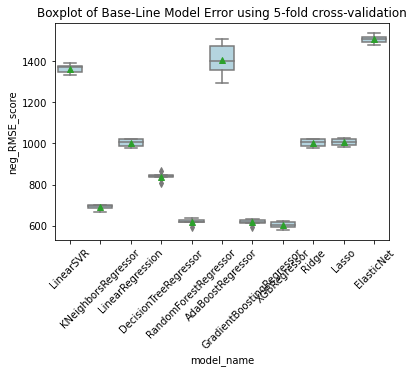

,Mean,Standard Deviation
model_name,,
ElasticNet,1506.906838,22.861094
AdaBoostRegressor,1406.959134,87.786349
LinearSVR,1363.051870,23.026913
Lasso,1006.910365,18.886002
Ridge,1003.697447,19.221565
LinearRegression,1003.629774,19.229036
DecisionTreeRegressor,839.142958,21.865984
KNeighborsRegressor,690.495496,14.128458
RandomForestRegressor,619.468620,15.918911


In [90]:
from sklearn.model_selection import KFold
def generate_baseline_results_c(models, X, y, metrics, cv=5, plot_results=False):
    # define k-fold:
    kfold = KFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X,y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, -score))
    
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'neg_RMSE_score'])
    if plot_results:
        sns.boxplot(x='model_name', y='neg_RMSE_score', data=cv_df, color='lightblue', showmeans=True)
        plt.title("Boxplot of Base-Line Model Error using 5-fold cross-validation")
        plt.xticks(rotation=45)
        plt.show()
    
    # Summary result
    mean = cv_df.groupby('model_name')['neg_RMSE_score'].mean()
    std = cv_df.groupby('model_name')['neg_RMSE_score'].std()
    
    baseline_results = pd.concat([mean, std], axis = 1, ignore_index=True)
    baseline_results.columns = ['Mean', 'Standard Deviation']
    
    # sort by error
    baseline_results.sort_values(by=['Mean'], ascending=False, inplace=True)
    
    return baseline_results
    
generate_baseline_results_c(models, X, y, metrics='neg_root_mean_squared_error', cv=5, plot_results=True)


## 5.4 Fine-Tune Model
with 3 best models

- RandomForestRegressor
- GradientBoostingRegressor
- XGBRegressor

### 5.4.1 Randomized Search
- minimize searching space for hyperparameter

In [99]:
g_boost = GradientBoostingRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()

In [152]:
from sklearn.model_selection import RandomizedSearchCV

# Setup random seed
np.random.seed(42)

param_grid = [
    {'learning_rate': [0.2, 0.3, 0.4], 'n_estimators':range(70,121,10)}
  ]

randomized_search = RandomizedSearchCV(g_boost, 
                           param_distributions=param_grid,
                           cv=5,
                           n_iter=10,
                           n_jobs = 4,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True,
                                      verbose=True)

randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=4,
                   param_distributions=[{'learning_rate': [0.2, 0.3, 0.4],
                                         'n_estimators': range(70, 121, 10)}],
                   return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=True)

In [153]:
cvres = randomized_search.cv_results_
for RMSE, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-RMSE, params)

620.6984358420343 {'n_estimators': 70, 'learning_rate': 0.2}
616.7227972858876 {'n_estimators': 80, 'learning_rate': 0.2}
611.5384749915653 {'n_estimators': 90, 'learning_rate': 0.3}
609.8619938079859 {'n_estimators': 120, 'learning_rate': 0.2}
612.6080473911197 {'n_estimators': 100, 'learning_rate': 0.2}
612.9367485267964 {'n_estimators': 80, 'learning_rate': 0.4}
608.7791863555758 {'n_estimators': 110, 'learning_rate': 0.4}
609.860377442158 {'n_estimators': 100, 'learning_rate': 0.4}
607.6510815785266 {'n_estimators': 120, 'learning_rate': 0.3}
614.2798562928157 {'n_estimators': 90, 'learning_rate': 0.2}


In [101]:
np.random.seed(42)

param_grid = [
    {'n_estimators':range(30,191,10), 'max_features':['sqrt', 'log2', None, 1.0]}
  ]

randomized_search = RandomizedSearchCV(rf, 
                           param_distributions=param_grid,
                           cv=5,
                           n_iter=10,
                           n_jobs = 4,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True,
                                      verbose=True)

randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=4,
                   param_distributions=[{'max_features': ['sqrt', 'log2', None,
                                                          1.0],
                                         'n_estimators': range(30, 191, 10)}],
                   return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=True)

In [102]:
cvres = randomized_search.cv_results_
for RMSE, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-RMSE, params)

615.6563786934819 {'n_estimators': 150, 'max_features': None}
615.6235153350443 {'n_estimators': 190, 'max_features': 'sqrt'}
618.9168497005305 {'n_estimators': 70, 'max_features': 'sqrt'}
617.6662449971078 {'n_estimators': 120, 'max_features': 'sqrt'}
615.4144756145898 {'n_estimators': 140, 'max_features': 'log2'}
616.8071508653468 {'n_estimators': 100, 'max_features': None}
616.4275229556667 {'n_estimators': 100, 'max_features': 1.0}
618.6463533069739 {'n_estimators': 80, 'max_features': 'sqrt'}
616.0845439563245 {'n_estimators': 130, 'max_features': 1.0}
616.6167403705841 {'n_estimators': 150, 'max_features': 'sqrt'}


In [161]:
np.random.seed(42)

param_grid = [
    {'learning_rate': [0.05, 0.1, 0.3], 'n_estimators':range(90,151,10)}
  ]

randomized_search = RandomizedSearchCV(xgb, 
                           param_distributions=param_grid,
                           cv=5,
                           n_iter=10,
                           n_jobs = 4,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True,
                                      verbose=True)

randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                            

In [162]:
cvres = randomized_search.cv_results_
for RMSE, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-RMSE, params)

593.87910624141 {'n_estimators': 90, 'learning_rate': 0.05}
613.1928026849126 {'n_estimators': 120, 'learning_rate': 0.3}
610.5548914094418 {'n_estimators': 100, 'learning_rate': 0.3}
590.2071519805221 {'n_estimators': 100, 'learning_rate': 0.05}
589.9403313094766 {'n_estimators': 100, 'learning_rate': 0.1}
587.0622018256261 {'n_estimators': 140, 'learning_rate': 0.05}
591.6623901692628 {'n_estimators': 130, 'learning_rate': 0.1}
587.3865760662197 {'n_estimators': 120, 'learning_rate': 0.05}
614.5295183000322 {'n_estimators': 130, 'learning_rate': 0.3}
611.6250891441057 {'n_estimators': 110, 'learning_rate': 0.3}


### 5.4.2 Grid Search
- specific tune hyperparameter

In [103]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

param_grid = [
    {'n_estimators':range(100,131,10), 'max_features':['sqrt', 'log2', None]}
  ]

grid_search = GridSearchCV(rf, 
                           param_grid,
                           cv=5,
                           n_jobs = 4,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid=[{'max_features': ['sqrt', 'log2', None],
                          'n_estimators': range(100, 131, 10)}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [107]:
cvres = grid_search.cv_results_
for RMSE, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-RMSE, params)

618.2859430450087 {'max_features': 'sqrt', 'n_estimators': 100}
617.082794072557 {'max_features': 'sqrt', 'n_estimators': 110}
616.673713150275 {'max_features': 'sqrt', 'n_estimators': 120}
616.6635598188735 {'max_features': 'sqrt', 'n_estimators': 130}
617.5446957839447 {'max_features': 'log2', 'n_estimators': 100}
617.3964227068149 {'max_features': 'log2', 'n_estimators': 110}
616.7109482425125 {'max_features': 'log2', 'n_estimators': 120}
617.002341979706 {'max_features': 'log2', 'n_estimators': 130}
616.6174224699378 {'max_features': None, 'n_estimators': 100}
616.4081732274557 {'max_features': None, 'n_estimators': 110}
616.9120409940447 {'max_features': None, 'n_estimators': 120}
615.3941917520691 {'max_features': None, 'n_estimators': 130}


for RandomForest, we see that we can still make our model better by increase `n_estimators` until it convergence

[614.480830927861, 614.7854968583313, 615.2874240311176, 615.141679543236, 615.3441965118257, 615.1681445125765]


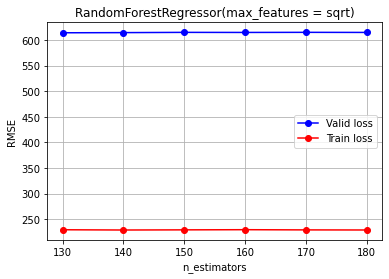

In [105]:
train_rmse = []
rmse = []
parameter = range(130, 181, 10)
for p in parameter:
    model = RandomForestRegressor(max_features = 'sqrt', n_estimators = p)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_train_pred = model.predict(X_train)
    model_rmse = np.sqrt(mean_squared_error(y_pred, y_val))
    model_rmse_train = np.sqrt(mean_squared_error(y_train_pred, y_train))
    rmse.append(model_rmse)
    train_rmse.append(model_rmse_train)
print(rmse)
plt.plot(parameter, rmse, 'bo-', label = 'Valid loss')
plt.plot(parameter, train_rmse, 'ro-', label = 'Train loss')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.grid(True)
plt.title('RandomForestRegressor(max_features = sqrt)')
plt.legend()
plt.show()

[615.4833222826695, 615.8966009810206, 615.9317854682752, 615.354331009067, 616.154358246351, 614.8059483908023]


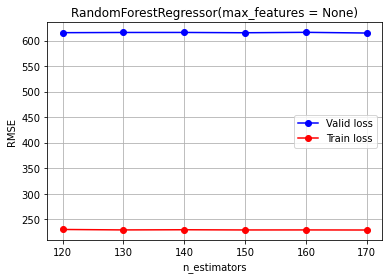

In [106]:
train_rmse = []
rmse = []
parameter = range(120, 171, 10)
for p in parameter:
    model = RandomForestRegressor(max_features = None, n_estimators = p)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_train_pred = model.predict(X_train)
    model_rmse = np.sqrt(mean_squared_error(y_pred, y_val))
    model_rmse_train = np.sqrt(mean_squared_error(y_train_pred, y_train))
    rmse.append(model_rmse)
    train_rmse.append(model_rmse_train)
print(rmse)
plt.plot(parameter, rmse, 'bo-', label = 'Valid loss')
plt.plot(parameter, train_rmse, 'ro-', label = 'Train loss')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.grid(True)
plt.title('RandomForestRegressor(max_features = None)')
plt.legend()
plt.show()

#### As we can witnessed form above, for Random Forest, we choose 'max_features = sqrt' and 'n_estimators = 130'

In [167]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

param_grid = [
    {'learning_rate': [0.3, 0.4], 'n_estimators':range(150,181,10)}
  ]

grid_search = GridSearchCV(g_boost, 
                           param_grid,
                           cv=5,
                           n_jobs = 4,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=4,
             param_grid=[{'learning_rate': [0.3, 0.4],
                          'n_estimators': range(150, 181, 10)}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [169]:
cvres = grid_search.cv_results_
for RMSE, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-RMSE, params)

605.5936010846717 {'learning_rate': 0.3, 'n_estimators': 150}
604.5499562268145 {'learning_rate': 0.3, 'n_estimators': 160}
604.7302890816964 {'learning_rate': 0.3, 'n_estimators': 170}
604.2384533106027 {'learning_rate': 0.3, 'n_estimators': 180}
606.6911024964187 {'learning_rate': 0.4, 'n_estimators': 150}
606.1120089412714 {'learning_rate': 0.4, 'n_estimators': 160}
605.9317963047633 {'learning_rate': 0.4, 'n_estimators': 170}
606.4091837334738 {'learning_rate': 0.4, 'n_estimators': 180}


for GradientBoosting, we see that we can still make our model better by increase `n_estimators` until it convergence

[601.7233473473891, 601.35066001631, 600.9514245038432, 600.9967341483643, 601.1339273105996, 598.6147663292415, 597.3787048514769, 597.6987793754746]


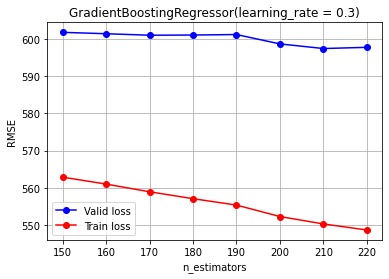

In [94]:
train_rmse = []
rmse = []
parameter = range(150, 221, 10)
for p in parameter:
    model = GradientBoostingRegressor(learning_rate = 0.3, n_estimators = p)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_train_pred = model.predict(X_train)
    model_rmse = np.sqrt(mean_squared_error(y_pred, y_val))
    model_rmse_train = np.sqrt(mean_squared_error(y_train_pred, y_train))
    rmse.append(model_rmse)
    train_rmse.append(model_rmse_train)
print(rmse)
plt.plot(parameter, rmse, 'bo-', label = 'Valid loss')
plt.plot(parameter, train_rmse, 'ro-', label = 'Train loss')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.grid(True)
plt.title('GradientBoostingRegressor(learning_rate = 0.3)')
plt.legend()
plt.show()

[601.2103626599038, 601.1319659317654, 600.056825362604, 600.3430305312679, 600.7845511686742, 599.4382733382896, 600.6545218880274, 600.6591869611728]


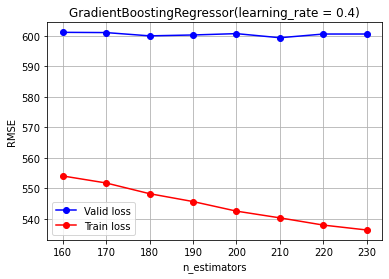

In [97]:
train_rmse = []
rmse = []
parameter = range(160, 231, 10)
for p in parameter:
    model = GradientBoostingRegressor(learning_rate = 0.4, n_estimators = p)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_train_pred = model.predict(X_train)
    model_rmse = np.sqrt(mean_squared_error(y_pred, y_val))
    model_rmse_train = np.sqrt(mean_squared_error(y_train_pred, y_train))
    rmse.append(model_rmse)
    train_rmse.append(model_rmse_train)
print(rmse)
plt.plot(parameter, rmse, 'bo-', label = 'Valid loss')
plt.plot(parameter, train_rmse, 'ro-', label = 'Train loss')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.grid(True)
plt.title('GradientBoostingRegressor(learning_rate = 0.4)')
plt.legend()
plt.show()

#### As we can witnessed form above, for Gradient Boosting, we choose 'learning_rate = 0.3' and 'n_estimators = 210'

In [170]:
np.random.seed(42)

param_grid = [
    {'learning_rate': [0.3], 'n_estimators':range(190,231,10)}
  ]

grid_search = GridSearchCV(g_boost, 
                           param_grid,
                           cv=5,
                           n_jobs = 4,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

cvres = grid_search.cv_results_
for RMSE, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-RMSE, params)

603.9155895558239 {'learning_rate': 0.3, 'n_estimators': 190}
603.7115268642093 {'learning_rate': 0.3, 'n_estimators': 200}
604.0201628337064 {'learning_rate': 0.3, 'n_estimators': 210}
604.0821133076533 {'learning_rate': 0.3, 'n_estimators': 220}
604.528090651974 {'learning_rate': 0.3, 'n_estimators': 230}


In [172]:
np.random.seed(42)

param_grid = [
    {'learning_rate': [0.05, 0.1], 'n_estimators':range(120,151,10)}
  ]

grid_search = GridSearchCV(xgb, 
                           param_grid,
                           cv=5,
                           n_jobs = 4,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estim

In [174]:
cvres = grid_search.cv_results_
for RMSE, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-RMSE, params)

587.3865760662197 {'learning_rate': 0.05, 'n_estimators': 120}
587.0276884603251 {'learning_rate': 0.05, 'n_estimators': 130}
587.0622018256261 {'learning_rate': 0.05, 'n_estimators': 140}
587.2164882198028 {'learning_rate': 0.05, 'n_estimators': 150}
591.1602189109846 {'learning_rate': 0.1, 'n_estimators': 120}
591.6623901692628 {'learning_rate': 0.1, 'n_estimators': 130}
591.8973054872204 {'learning_rate': 0.1, 'n_estimators': 140}
592.493401872275 {'learning_rate': 0.1, 'n_estimators': 150}


[581.0976001507769, 580.3799323564934, 580.110662257344, 579.9031432053793, 579.7636625417268, 579.8810823788307]


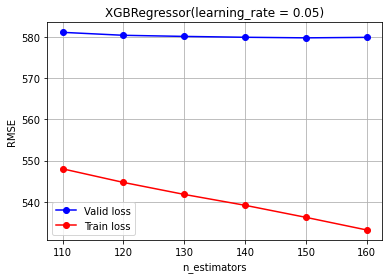

In [25]:
train_rmse = []
rmse = []
parameter = range(110, 161, 10)
for p in parameter:
    model = XGBRegressor(learning_rate = 0.05, n_estimators = p)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_train_pred = model.predict(X_train)
    model_rmse = np.sqrt(mean_squared_error(y_pred, y_val))
    model_rmse_train = np.sqrt(mean_squared_error(y_train_pred, y_train))
    rmse.append(model_rmse)
    train_rmse.append(model_rmse_train)
print(rmse)
plt.plot(parameter, rmse, 'bo-', label = 'Valid loss')
plt.plot(parameter, train_rmse, 'ro-', label = 'Train loss')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.grid(True)
plt.title('XGBRegressor(learning_rate = 0.05)')
plt.legend()
plt.show()

after doing `randomizedSearch` and `GridSearch` for 3 best model 

For RandomForest we choose 'max_features = sqrt' and 'n_estimators = 130'

For GradientBoosting we choose 'learning_rate': 0.3, 'n_estimators': 210

For XGBoosting we choose 'learning_rate': 0.05, 'n_estimators': 140

# 6. Submission <a class="anchor" id="submission"></a>

In [15]:
X_final = train_df.drop('price', axis = 1)
y_final = train_df['price']
X_final.shape, y_final.shape

((193556, 11), (193556,))

In [16]:
test_df = pd.read_csv('test.csv', index_col = 'id')

Because depth make by divided by diameter so it can not be 0 but in test_df has some 0 one so we need to be careful, take the original depth

In [128]:
test_df

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
193573,0.35,Ideal,D,VS2,62.3,56.0,4.51,4.54,2.82
193574,0.77,Very Good,F,SI2,62.8,56.0,5.83,5.87,3.68
193575,0.71,Ideal,I,VS2,61.9,53.0,5.77,5.74,3.55
193576,0.33,Ideal,G,VVS2,61.6,55.0,4.44,4.42,2.73
193577,1.20,Very Good,I,VS2,62.7,56.0,6.75,6.79,4.24
...,...,...,...,...,...,...,...,...,...
322618,0.72,Ideal,D,VVS2,62.0,56.0,5.75,5.78,3.57
322619,0.70,Premium,D,SI1,59.6,62.0,5.77,5.74,3.43
322620,1.01,Premium,G,VVS2,62.3,58.0,6.44,6.41,4.01


In [17]:
test_df['diameter'] = round((test_df.x + test_df.y)/2, 2)
test_df['depth_adj'] = round((test_df.z/test_df.diameter)*100, 1)

test_df['weight_cat'] = pd.cut(test_df['carat'],
                               bins=[0., 0.5, 1.5, np.inf],
                               labels=[1, 2, 3])
#test_df['esti_volume'] = round(test_df.z*test_df.y*test_df.x, 2)

In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129050 entries, 193573 to 322622
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   carat       129050 non-null  float64 
 1   cut         129050 non-null  object  
 2   color       129050 non-null  object  
 3   clarity     129050 non-null  object  
 4   depth       129050 non-null  float64 
 5   table       129050 non-null  float64 
 6   x           129050 non-null  float64 
 7   y           129050 non-null  float64 
 8   z           129050 non-null  float64 
 9   diameter    129050 non-null  float64 
 10  depth_adj   129047 non-null  float64 
 11  weight_cat  129050 non-null  category
dtypes: category(1), float64(8), object(3)
memory usage: 11.9+ MB


In [19]:
null_rows = test_df[test_df['depth_adj'].isnull()]
null_index = null_rows.index
test_df.loc[null_index, 'depth_adj'] = null_rows['depth']

In [20]:
test_df.drop('depth', axis = 1, inplace = True)
test_df['carat'] = np.sqrt(test_df['carat'])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129050 entries, 193573 to 322622
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   carat       129050 non-null  float64 
 1   cut         129050 non-null  object  
 2   color       129050 non-null  object  
 3   clarity     129050 non-null  object  
 4   table       129050 non-null  float64 
 5   x           129050 non-null  float64 
 6   y           129050 non-null  float64 
 7   z           129050 non-null  float64 
 8   diameter    129050 non-null  float64 
 9   depth_adj   129050 non-null  float64 
 10  weight_cat  129050 non-null  category
dtypes: category(1), float64(7), object(3)
memory usage: 15.0+ MB


In [21]:
convert_cat(test_df, cat_features)

In [22]:
preprocessor.fit(X_final)
X_final = preprocessor.transform(X_final)

In [23]:
X_test = preprocessor.transform(test_df)

In [84]:
model_reg1 = XGBRegressor(learning_rate = 0.05, n_estimators = 140)
model_reg1.fit(X_final, y_final)
y_pred1 = model_reg1.predict(X_test)
y_pred1

array([ 865.9622, 2506.9612, 2346.4873, ..., 7603.203 , 5876.5376,
       4319.7324], dtype=float32)

In [85]:
model_reg2 = GradientBoostingRegressor(learning_rate = 0.3, n_estimators = 210)
model_reg2.fit(X_final, y_final)
y_pred2 = model_reg2.predict(X_test)
y_pred2

array([ 836.96458691, 2528.05385757, 2297.94641048, ..., 8113.56556708,
       5659.24082308, 4143.41201361])

In [95]:
df_prediction = pd.DataFrame({'id': test_df.index,
                       'price': y_pred})
df_prediction.head(10)

,id,price
0,193573,863.245130
1,193574,2481.920780
2,193575,2354.564436
3,193576,851.522958
4,193577,5782.712319
5,193578,658.948056
6,193579,12326.697583
7,193580,2988.271382
8,193581,15123.118662
9,193582,1917.764980


In [96]:
df_prediction.to_csv('MyMJ2.csv', index=False)

In [94]:
y_pred = (y_pred1 + y_pred2)/2
y_pred

array([ 863.24513035, 2481.92077966, 2354.56443636, ..., 7744.17184738,
       5847.55283416, 4289.89792364])

### My Major Voting method

the strategy is we take 3 best method fusion it by mathematics below to give our final prediction(the ideal is based on bagging of ensemble)

we have min(RMSE) : meaning of best model and max(RMSE) and middle(RMSE)

we take percentage error of RMSE by: p_error = (RMSE - min(RMSE))/min(RMSE)*100 : unit (%)

then based on our best model prediction: 
- if prediction of best model > prediction(p) of model: p + p*p_error
- if prediction of best model < prediction(p) of model: p - p*p_error

finally we take the average of 3 models prediction 

In [83]:
forest_reg = RandomForestRegressor(max_features = 'sqrt', n_estimators = 130, random_state=21)


forest_scores = cross_val_score(forest_reg, X_final, y_final,                          
                             scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [618.08519986 606.65005264 602.35639976 592.67880264 603.03422822]
Mean: 604.5609366244413
Standard deviation: 8.193241497832489


In [81]:
g_boost_reg = GradientBoostingRegressor(learning_rate = 0.3, n_estimators = 200, random_state=21)


g_boost_scores = cross_val_score(g_boost_reg, X_final, y_final,                          
                             scoring="neg_mean_squared_error", cv=5)
g_boost_rmse_scores = np.sqrt(-g_boost_scores)
display_scores(g_boost_rmse_scores)

Scores: [602.06454175 594.53673686 589.7324686  575.66216355 590.04384548]
Mean: 590.4079512462511
Standard deviation: 8.613362613510297


In [82]:
xgb_reg = XGBRegressor(learning_rate = 0.05, n_estimators = 140, random_state=21)


xgb_scores = cross_val_score(xgb_reg, X_final, y_final,                          
                             scoring="neg_mean_squared_error", cv=5)
xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(xgb_rmse_scores)

Scores: [586.3425971  577.61017597 573.64165119 559.64808186 573.96286553]
Mean: 574.2410743309772
Standard deviation: 8.616145737582157


In [86]:
rf_p_error = (forest_rmse_scores.mean() - xgb_rmse_scores.mean())/xgb_rmse_scores.mean()*100
g_boost_p_error = (g_boost_rmse_scores.mean() - xgb_rmse_scores.mean())/xgb_rmse_scores.mean()*100

In [87]:
model_reg3 = RandomForestRegressor(max_features = 'sqrt', n_estimators = 130)
model_reg3.fit(X_final, y_final)
y_pred3 = model_reg3.predict(X_test)
y_pred3

array([ 860.12307692, 2410.32307692, 2245.1       , ..., 7536.63846154,
       6553.05384615, 4306.15384615])

In [88]:
def MyMVChanging(y_pred_best, y_pred_other, p_error):
    for i in range(y_pred_best.shape[0]):
        if y_pred_best[i] > y_pred_other[i]:
            y_pred_other[i] += (y_pred_other[i]*p_error)/100
        elif y_pred_best[i] < y_pred_other[i]:
            y_pred_other[i] -= (y_pred_other[i]*p_error)/100
    return y_pred_other

In [89]:
y_pred2 = MyMVChanging(y_pred1, y_pred2, g_boost_p_error)
y_pred3 = MyMVChanging(y_pred1, y_pred3, rf_p_error)

In [90]:
y_pred3

array([ 905.53747588, 2537.58785655, 2363.64102028, ..., 7934.57210043,
       6207.05336117, 4533.51827107])

In [91]:
y_pred = (y_pred1 + y_pred2 + y_pred3)/3
y_pred

array([ 877.34257886, 2500.47647196, 2357.58996433, ..., 7807.6385984 ,
       5967.38634316, 4371.10470612])

# Result <a class="anchor" id="result"></a>

- no tuning

xgb : 586.17, 592.46

ensemble bagging xgb and rf : 585.43, 591.5

- tuning by hand 

xgb : 576.09, 583.62

ensemble bagging xgb and rf : 582.01, 588.16

myMVmethod(use 2 models xgb and g_boost) : 578.72, 587.42

myMVmethod(use 3 models) : 582.31, 589.18

- autoML

###### h2o

h2o_partial : 575.33, 579.44

h2o_full : 575.35, 582.45

h2o_pre : 574.99, 581.79

h2o_pre2(not applying sqrt for `carat`) : 574.45, 580.87 

###### Optuna

xgb: 575.59, 583.07

ensemble bagging xgb and gb : 574.1, 581.36

myMVmethod(use 2 models xgb and g_boost) : 574.07, 581.25

# Bonus. Using Tools autoML 

### 1. AutoML help choosing algorithms

#### h20

In [176]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.361-b09, mixed mode)
  Starting server from C:\Anaconda\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\minhm\AppData\Local\Temp\tmpmtw_84_1
  JVM stdout: C:\Users\minhm\AppData\Local\Temp\tmpmtw_84_1\h2o_minhm_started_from_python.out
  JVM stderr: C:\Users\minhm\AppData\Local\Temp\tmpmtw_84_1\h2o_minhm_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Bangkok
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,2 months and 5 days
H2O_cluster_name:,H2O_from_python_minhm_hf05hh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.424 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [177]:
print(h2o.estimators.xgboost.H2OXGBoostEstimator.available())

Cannot build an XGBoost model - no backend found.
False


Unfortunately, windows and macOS do not support XGB so our h2o will can not execute it, we need linux for that. It may our model prediction a little bit weaker because XGB is quite a strong model 

In [178]:
df = h2o.import_file('train.csv')
df.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:193573
Cols:11

,id,carat,cut,color,clarity,depth,table,x,y,z,price
type,int,real,enum,enum,enum,real,real,real,real,real,int
mins,0.0,0.2,,,,52.1,49.0,0.0,0.0,0.0,326.0
mean,96786.0,0.7906878541945417,,,,61.82057415032055,57.227674830684045,5.71531210447738,5.72009438299763,3.5342463360076044,3969.1554142364894
maxs,193572.0,3.5,,,,71.6,79.0,9.65,10.01,31.3,18818.0
sigma,55879.8561663026,0.4626877391502206,,,,1.0817043574329794,1.9188442793738754,1.1094221570348355,1.1023334834958547,0.6889221063801614,4034.3741376922844
zeros,1,0,,,,0,0,3,2,10,0
missing,0,0,0,0,0,0,0,0,0,0,0
0,0.0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,1.0,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,2.0,0.7,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.5,2772.0


In [179]:
splits = df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

In [180]:
aml1 = H2OAutoML(max_runtime_secs = 180, seed = 1, sort_metric='rmse')
aml1.train(y = 'price', training_frame = train, leaderboard_frame = test)

AutoML progress: |
16:55:49.381: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/9
# GBM base models (used / total),4/5
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [181]:
aml2 = H2OAutoML(max_runtime_secs = 180, seed = 1, sort_metric='rmse')
aml2.train(y = 'price', training_frame = df)

AutoML progress: |
16:59:16.506: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/9
# GBM base models (used / total),4/5
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [182]:
aml1.leaderboard.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_2_AutoML_1_20230703_165549,572.844,328150,293.722,0.108302,328150
StackedEnsemble_AllModels_3_AutoML_1_20230703_165549,572.976,328302,293.739,0.108301,328302
StackedEnsemble_AllModels_1_AutoML_1_20230703_165549,573.148,328499,293.208,0.107861,328499
StackedEnsemble_BestOfFamily_2_AutoML_1_20230703_165549,574.458,330002,294.545,0.108765,330002
GBM_2_AutoML_1_20230703_165549,574.504,330055,294.669,0.108859,330055
GBM_5_AutoML_1_20230703_165549,574.992,330616,296.917,0.110477,330616
GBM_3_AutoML_1_20230703_165549,575.16,330810,294.207,0.108033,330810
StackedEnsemble_BestOfFamily_3_AutoML_1_20230703_165549,575.925,331690,296.529,0.109122,331690
GBM_1_AutoML_1_20230703_165549,577.515,333523,293.088,0.106157,333523
StackedEnsemble_BestOfFamily_1_AutoML_1_20230703_165549,577.518,333527,293.48,0.106499,333527


In [184]:
aml2.leaderboard.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_2_AutoML_2_20230703_165916,572.352,327587,292.68,0.106568,327587
StackedEnsemble_AllModels_3_AutoML_2_20230703_165916,572.357,327592,292.68,0.106575,327592
StackedEnsemble_AllModels_1_AutoML_2_20230703_165916,572.546,327809,292.58,0.106384,327809
StackedEnsemble_BestOfFamily_3_AutoML_2_20230703_165916,573.484,328884,294.979,0.108947,328884
GBM_2_AutoML_2_20230703_165916,574.182,329685,294.277,0.107552,329685
StackedEnsemble_BestOfFamily_2_AutoML_2_20230703_165916,574.207,329714,294.345,0.107633,329714
GBM_3_AutoML_2_20230703_165916,574.536,330091,293.517,0.106415,330091
GBM_5_AutoML_2_20230703_165916,575.78,331522,296.866,0.10921,331522
GBM_1_AutoML_2_20230703_165916,576.885,332797,292.308,0.104671,332797
StackedEnsemble_BestOfFamily_1_AutoML_2_20230703_165916,576.989,332917,292.859,0.105165,332917


aml1 using 80% datasets, aml2 using 100% datasets

Loading test for prediction

In [193]:
test_h2o = h2o.import_file('test.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [194]:
pred = aml2.predict(test_h2o)
pred.head()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict
879.142
2519.47
2300.87
837.747
5743.11
687.061
12328.5
3017.27
14994.9
1863.23


In [195]:
pred = pred.as_data_frame()
pred = pred.values
pred = pred.reshape(-1)

test_h2o = test_h2o.as_data_frame()
test_h2o.set_index('id', inplace=True)

In [196]:
df_prediction = pd.DataFrame({'id': test_h2o.index,
                       'price': pred})
df_prediction

,id,price
0,193573,879.141757
1,193574,2519.467621
2,193575,2300.870913
3,193576,837.746736
4,193577,5743.113965
...,...,...
129045,322618,3775.757281
129046,322619,2591.368253
129047,322620,7597.054243
129048,322621,5733.814569


In [197]:
df_prediction.to_csv('h2o_full.csv', index=False)

##### Now we do preprocessing before doing h2o

In [268]:
X_final = train_df.drop('price', axis = 1)
y_final = train_df['price']
X_final.shape, y_final.shape

((193556, 11), (193556,))

In [269]:
preprocessor.fit(X_final)
X_final = preprocessor.transform(X_final)

In [270]:
y_final_reshaped = y_final.values.reshape(-1, 1)

combined_array = np.hstack((X_final, y_final_reshaped))

In [271]:
pre_col = list(num_features)
pre_col += cat_features
pre_col.append('price')

In [272]:
preproces_df = pd.DataFrame(combined_array, columns=pre_col)
preproces_df

,carat,depth_adj,table,x,y,z,diameter,cut,color,clarity,weight_cat,price
0,1.518495,0.444636,0.402574,1.401939,1.461007,1.482353,1.431587,3.0,2.0,4.0,2.0,13619.0
1,2.286157,0.536302,0.402574,2.114283,2.177890,2.212002,2.146311,2.0,6.0,6.0,2.0,13387.0
2,-0.066541,-0.472033,-0.118584,-0.022749,0.009094,-0.049908,-0.006907,4.0,3.0,3.0,1.0,2772.0
3,-1.150539,-0.105366,-0.639742,-1.203978,-1.188734,-1.202753,-1.201129,4.0,3.0,3.0,0.0,666.0
4,1.802352,0.627969,0.923732,1.744585,1.715092,1.803399,1.730143,3.0,3.0,4.0,2.0,14453.0
...,...,...,...,...,...,...,...,...,...,...,...,...
193551,-1.186178,-0.655367,-0.639742,-1.231029,-1.206883,-1.261125,-1.219224,4.0,0.0,2.0,0.0,1130.0
193552,-0.066541,-1.480368,0.402574,0.031353,0.045392,-0.093687,0.038328,3.0,3.0,2.0,1.0,2874.0
193553,0.004427,1.177970,-0.118584,0.004302,0.027243,0.125207,0.020234,2.0,2.0,5.0,1.0,3036.0
193554,-1.080893,0.994637,-1.160900,-1.140859,-1.116138,-1.056823,-1.128752,2.0,0.0,5.0,0.0,681.0


In [273]:
h2o_frame = h2o.H2OFrame(preproces_df)
x = h2o_frame.columns
y = 'price'
x.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [274]:
aml3 = H2OAutoML(sort_metric='rmse', max_runtime_secs=180, seed=1)
aml3.train(x=x, y=y, training_frame=h2o_frame)

AutoML progress: |
21:30:09.627: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/13
# GBM base models (used / total),4/7
# DeepLearning base models (used / total),1/3
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [275]:
aml3.leaderboard.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_8_20230703_213009,572.389,327629,292.974,0.106634,327629
StackedEnsemble_AllModels_2_AutoML_8_20230703_213009,572.412,327655,292.976,0.106635,327655
StackedEnsemble_AllModels_1_AutoML_8_20230703_213009,572.663,327942,292.853,0.106386,327942
StackedEnsemble_BestOfFamily_3_AutoML_8_20230703_213009,573.054,328391,294.591,0.108016,328391
GBM_2_AutoML_8_20230703_213009,574.11,329602,294.4,0.107462,329602
StackedEnsemble_BestOfFamily_2_AutoML_8_20230703_213009,574.187,329691,294.553,0.107587,329691
GBM_3_AutoML_8_20230703_213009,574.471,330017,293.383,0.106326,330017
GBM_5_AutoML_8_20230703_213009,574.856,330459,296.242,0.108991,330459
GBM_1_AutoML_8_20230703_213009,576.016,331795,292.253,0.104701,331795
StackedEnsemble_BestOfFamily_1_AutoML_8_20230703_213009,576.128,331923,292.699,0.105096,331923


In [276]:
test_df = pd.read_csv('test.csv', index_col = 'id')

test_df['diameter'] = round((test_df.x + test_df.y)/2, 2)
test_df['depth_adj'] = round((test_df.z/test_df.diameter)*100, 1)

null_rows = test_df[test_df['depth_adj'].isnull()]
null_index = null_rows.index
test_df.loc[null_index, 'depth_adj'] = null_rows['depth']

test_df.drop('depth', axis = 1, inplace = True)

test_df['carat'] = np.sqrt(test_df['carat'])

test_df['weight_cat'] = pd.cut(test_df['carat'],
                               bins=[0., 0.5, 1.5, np.inf],
                               labels=[1, 2, 3])
convert_cat(test_df, cat_features)

X_test = preprocessor.transform(test_df)

pre_col.remove('price')

preproces_test_df = pd.DataFrame(X_test, columns=pre_col)

In [277]:
test_frame = h2o.H2OFrame(preproces_test_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [278]:
pred = aml3.predict(test_frame)
pred.head()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict
897.339
2504.16
2344.36
881.054
5837.53
733.364
12397.7
2985.36
15473.3
1890.2


In [279]:
pred = pred.as_data_frame()
pred = pred.values
pred = pred.reshape(-1)

In [280]:
df_prediction = pd.DataFrame({'id': test_h2o.index,
                       'price': pred})
df_prediction

,id,price
0,193573,897.338747
1,193574,2504.164714
2,193575,2344.355321
3,193576,881.053511
4,193577,5837.532207
...,...,...
129045,322618,3816.483723
129046,322619,2608.840536
129047,322620,7661.710017
129048,322621,5742.984512


In [281]:
df_prediction.to_csv('h2o_pre.csv', index=False)

for `h2o_pre2.csv` result, please check in file `Experiment.ipynb` part h2o testing

### 2. AutoML help tuning hyper-parameter

helping with 3 best model so far we have tuning parameter so we can see if we can make it better

#### Optuna

Using Meta-heuristic approaches

That being said, as data volume gets larger and models get more complex, the cost of randomly training a set of hyperparameters without any information increases tremendously, and these advanced algorithms greatly outperform traditional methods

Please check the implementation in file `Experiment.ipynb` part Optuna testing

Here we have some hyper-parameter after tuning for submission

In [25]:
best_params_xgb = {'tree_method': 'gpu_hist',
                   'reg_lambda': 2.553793950847241,
                   'colsample_bytree': 0.9,
                   'colsample_bylevel': 0.8,
                   'subsample': 0.9,
                   'learning_rate': 0.04480245593299995,
                   'n_estimators': 150,
                   'max_depth': 9,
                   'min_child_weight': 3,
                   'grow_policy': 'lossguide'}

In [65]:
from xgboost import XGBRegressor
model_reg1 = XGBRegressor(**best_params_xgb, random_state = 21)
model_reg1.fit(X_final, y_final)
y_pred1 = model_reg1.predict(X_test)
y_pred1

array([ 881.7683, 2451.2637, 2313.1284, ..., 7564.239 , 5662.8535,
       4211.0522], dtype=float32)

In [28]:
# df_prediction = pd.DataFrame({'id': test_df.index,
#                        'price': y_pred})
# df_prediction.head(10)

,id,price
0,193573,868.190588
1,193574,2510.185559
2,193575,2330.329803
3,193576,857.791785
4,193577,5762.410496
5,193578,685.606091
6,193579,12365.319880
7,193580,2959.270256
8,193581,15215.576616
9,193582,1888.232500


In [70]:
# df_prediction.to_csv('xgbAndgbOptuna.csv', index=False)

In [1]:
best_params_gb = {'max_iter': 130, 
                  'learning_rate': 0.060053375192846106,
                  'l2_regularization': 0.7000000000000001}

In [66]:
from sklearn.ensemble import HistGradientBoostingRegressor
model_reg2 = HistGradientBoostingRegressor(**best_params_gb, random_state = 21)
model_reg2.fit(X_final, y_final)
y_pred2 = model_reg2.predict(X_test)
y_pred2

array([ 854.90483289, 2578.26307696, 2311.36145751, ..., 7598.51143413,
       6018.65532703, 4288.77089572])

In [73]:
y_pred = (y_pred1+y_pred2)/2 

Doing My Major Voting Method

In [35]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [43]:
g_boost_reg = HistGradientBoostingRegressor(**best_params_gb, random_state=21)


g_boost_scores = cross_val_score(g_boost_reg, X_final, y_final,                          
                             scoring="neg_mean_squared_error", cv=5)
g_boost_rmse_scores = np.sqrt(-g_boost_scores)
display_scores(g_boost_rmse_scores)

Scores: [588.25141136 581.69055459 573.86190319 560.47612172 577.12251063]
Mean: 576.2805002993176
Standard deviation: 9.26183971591889


In [44]:
xgb_reg = XGBRegressor(**best_params_xgb, random_state=21)


xgb_scores = cross_val_score(xgb_reg, X_final, y_final,                          
                             scoring="neg_mean_squared_error", cv=5)
xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(xgb_rmse_scores)

Scores: [588.11893535 578.47130772 571.0928092  560.13760936 573.98885645]
Mean: 574.3619036152629
Standard deviation: 9.157508546221056


In [59]:
g_boost_p_error = (g_boost_rmse_scores.mean() - xgb_rmse_scores.mean())/xgb_rmse_scores.mean()*100

def MyMVChanging(y_pred_best, y_pred_other, p_error):
    for i in range(y_pred_best.shape[0]):
        if y_pred_best[i] > y_pred_other[i]:
            y_pred_other[i] += (y_pred_other[i]*p_error)/100
        elif y_pred_best[i] < y_pred_other[i]:
            y_pred_other[i] -= (y_pred_other[i]*p_error)/100
    return y_pred_other

g_boost_p_error

0.3340396833387264

In [71]:
y_pred2 = MyMVChanging(y_pred1, y_pred2, g_boost_p_error)

In [72]:
y_pred2

array([ 857.76055429, 2569.65065514, 2319.082322  , ..., 7573.1293906 ,
       5998.55062983, 4274.444699  ])

In [74]:
df_prediction = pd.DataFrame({'id': test_df.index,
                       'price': y_pred})
df_prediction.head(10)

,id,price
0,193573,869.764432
1,193574,2510.457164
2,193575,2316.105370
3,193576,852.950761
4,193577,5793.987795
5,193578,692.500968
6,193579,12441.728522
7,193580,2948.485024
8,193581,15550.613294
9,193582,1900.215803


In [75]:
df_prediction.to_csv('MyMJOptuna2.csv', index=False)

##### In our experiment, we have try add `esti_volume` or remove `x`, `y` or remove `weight_cat`. Fusion 2 of 3 or 3 of it but just make the result worse so decide to stop. Also we change the order of encoder of `cut` to make categorical go from best to worst by 0 to ... And `weight_cat`  also too check in 'Experiment.ipynb'. Best result have so far is 574